<h1>Pymaceuticals Inc</h1>

![](Laboratory.jpg)

# Table of contents
1. Introduction<br>
2. Import libraries
3. Import CSV files
4. Tumor Response to Treatment Table
6. Metastatic Response to Treatment Table
7. Survival Rates Table
8. Summary Bar Graph
9. Conclusion

<h3><u>Introduction</u></h3>

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use Matplotlib for all plotting.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.

<h3><u>Import libraries</u></h3>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h3><u>Import CSV files</u></h3>

In [2]:
#import csv files for analysis
df_clinicaltrial = pd.read_csv('raw_data/clinicaltrial_data.csv')
df_mouse_drug = pd.read_csv('raw_data/mouse_drug_data.csv')

In [3]:
#check for duplicates and keep first in df_clinicaltrial dataframe
df_clinicaltrial.drop_duplicates(keep='first',inplace=True)

#merge df_mouse_drug and df_clinicaltrial
df_treatment = df_clinicaltrial.merge(df_mouse_drug,how='outer',on='Mouse ID')

df_treatment.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


<h3><u>Tumor Response to Treatment</u></h3>

In [4]:
#Using groupby found the mean and standard deviation of Tumor Volume for while grouping-by Drug and TimePoint
df_drug_mean_Tumor_Volume =pd.DataFrame(df_treatment.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean())
df_drug_error_Tumor_Volume =pd.DataFrame(df_treatment.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].std())

#Using pivot table to reshape groupby for df_drug_mean_Tumor_volume and df_drug_error_Tumor_Volume
PT_drug_mean_Tumor_Volume =df_drug_mean_Tumor_Volume.pivot_table(values=['Tumor Volume (mm3)'],index=['Timepoint'],columns=['Drug'])
PT_drug_error_Tumor_Volume =df_drug_error_Tumor_Volume.pivot_table(values=['Tumor Volume (mm3)'],index=['Timepoint'],columns=['Drug'])

In [5]:
#Using droplevels and column names to remove multiIndex
PT_drug_error_Tumor_Volume.columns = PT_drug_error_Tumor_Volume.columns.droplevel()
PT_drug_mean_Tumor_Volume.columns = PT_drug_mean_Tumor_Volume.columns.droplevel()

PT_drug_mean_Tumor_Volume.columns.name = None
PT_drug_error_Tumor_Volume.columns.name = None

In [6]:
#Display PT_drug_mean_Tumor_Volume DataFrame
PT_drug_mean_Tumor_Volume.style.background_gradient(cmap='autumn')

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45,45,45,45,45,45,45,45,45,45
5,44.2661,46.5031,47.062,47.3892,46.7961,47.1256,47.249,43.9449,47.5275,46.8518
10,43.0843,48.2851,49.4039,49.5823,48.6942,49.4233,49.1015,42.532,49.4638,48.6899
15,42.0643,50.0941,51.2964,52.4,50.933,51.3597,51.0673,41.4951,51.5294,50.7791
20,40.7163,52.157,53.1977,54.9209,53.6441,54.3644,53.3467,40.2383,54.0674,53.1703
25,39.9395,54.2877,55.7153,57.679,56.732,57.4826,55.5041,38.9743,56.1661,55.4329
30,38.7693,56.7695,58.2994,60.9945,59.5595,59.8091,58.1964,38.7031,59.8267,57.7135
35,37.8168,58.8275,60.7425,63.3717,62.6851,62.4206,60.3502,37.452,62.4407,60.0894
40,36.958,61.4679,63.1628,66.0686,65.6008,65.0527,63.0455,36.5741,65.3564,62.9167


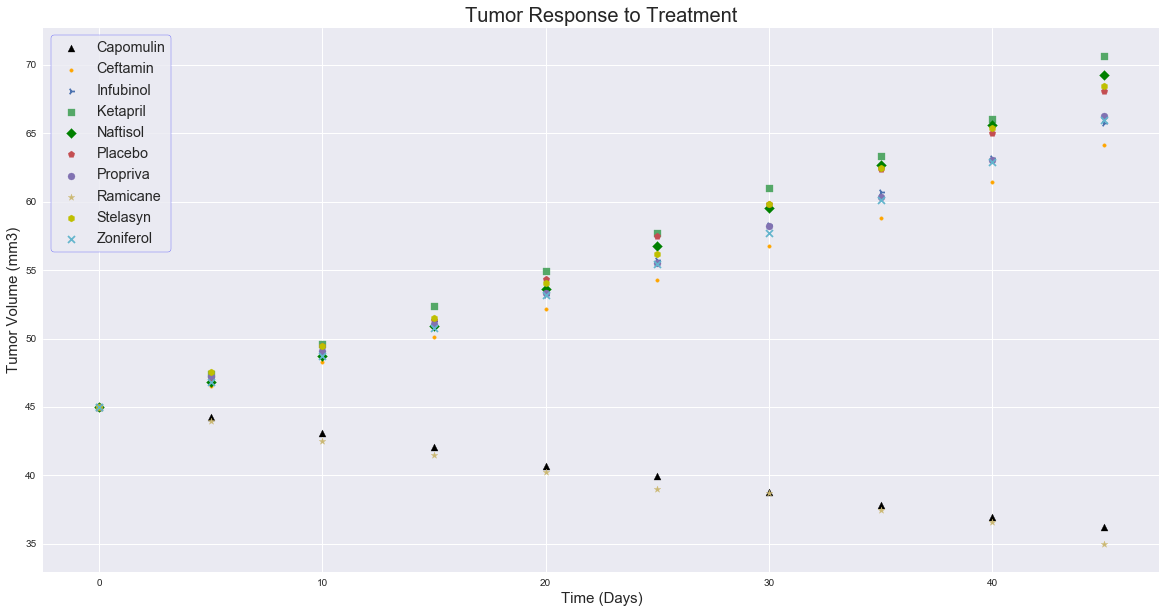

In [7]:
#Using list comprehension for x-values
day =[value for value in PT_drug_mean_Tumor_Volume.index]

#Plot Tumor Response to Treatment using a scatter plots for each treatment
plt.figure(figsize=(20,10))
plt.scatter(day,PT_drug_mean_Tumor_Volume.Capomulin,color='black',marker='^');
plt.scatter(day,PT_drug_mean_Tumor_Volume.Ceftamin,color='orange', marker= '.');
plt.scatter(day,PT_drug_mean_Tumor_Volume.Infubinol,marker='4');
plt.scatter(day,PT_drug_mean_Tumor_Volume.Ketapril,marker='s');
plt.scatter(day,PT_drug_mean_Tumor_Volume.Naftisol,color='green',marker='D');
plt.scatter(day,PT_drug_mean_Tumor_Volume.Placebo,marker='p');
plt.scatter(day,PT_drug_mean_Tumor_Volume.Propriva,marker='o');
plt.scatter(day,PT_drug_mean_Tumor_Volume.Ramicane,marker='*');
plt.scatter(day,PT_drug_mean_Tumor_Volume.Stelasyn,color='y',marker='h');
plt.scatter(day,PT_drug_mean_Tumor_Volume.Zoniferol,marker='x');


plt.legend(fontsize='x-large',frameon=True,edgecolor='b')
plt.title('Tumor Response to Treatment',fontsize= (20),);
plt.xlabel('Time (Days)',fontsize=(15));
plt.ylabel('Tumor Volume (mm3)',fontsize =(15));



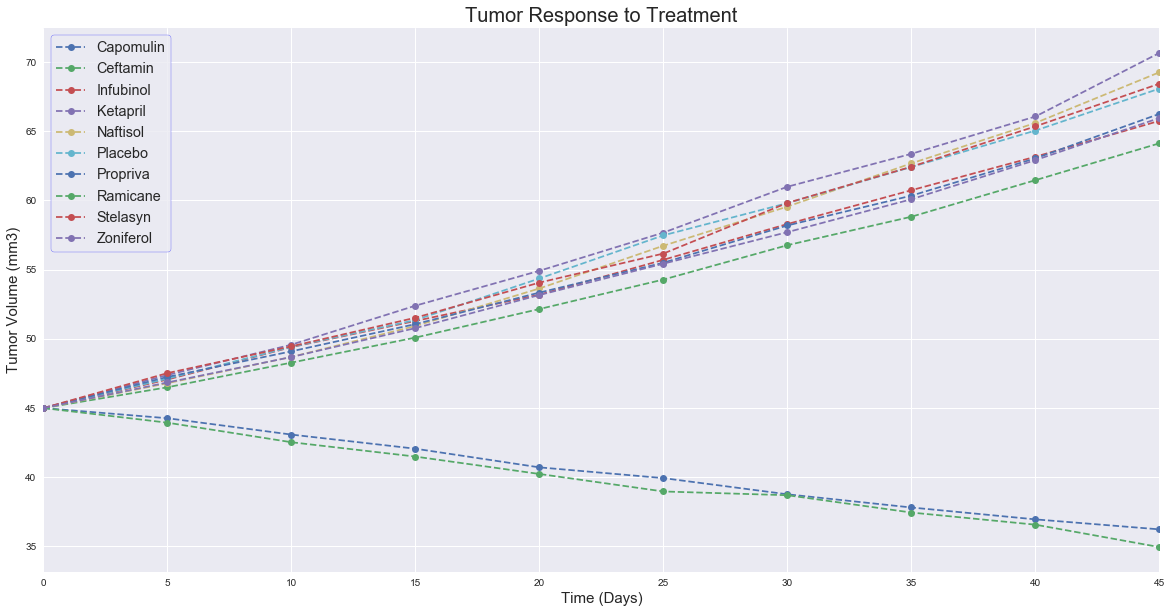

In [8]:
#Plot Tumor Response to to treatment using line plots 
PT_drug_mean_Tumor_Volume.plot(ls='--',figsize=(20,10),marker='o');

plt.legend(fontsize='x-large',frameon=True,edgecolor='b')
plt.title('Tumor Response to Treatment',fontsize= (20));
plt.xlabel('Time (Days)',fontsize=(15));
plt.ylabel('Tumor Volume (mm3)',fontsize =(15));



<h3><u>Metastatic Response to Treatment</u></h3>

In [9]:
#Using groupyby to determine the mean and standard deviation d Metastatic Sites for drug and timepoint
df_Metastatic_Response_std = pd.DataFrame(df_treatment.groupby(['Drug','Timepoint'])['Metastatic Sites'].std())
df_Metastatic_Response_std.head(5)

df_Metastatic_Response_mean = pd.DataFrame(df_treatment.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())
df_Metastatic_Response_mean.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
#Using droplevels and column names to remove multiIndex
PT_Metastatic_Response_mean=df_Metastatic_Response_mean.pivot_table(values=['Metastatic Sites'],index=['Timepoint'],columns=['Drug'])
PT_Metastatic_Response_mean.columns = PT_Metastatic_Response_mean.columns.droplevel()
PT_Metastatic_Response_mean.columns.name = None



PT_Metastatic_Response_std = df_Metastatic_Response_std.pivot_table(values=['Metastatic Sites'],index=['Timepoint'],columns=['Drug'])
PT_Metastatic_Response_std.columns = PT_Metastatic_Response_std.columns.droplevel()
PT_Metastatic_Response_std.columns.name = None


PT_Metastatic_Response_mean.style.background_gradient(cmap='autumn')

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0
5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667
10,0.32,0.6,0.666667,0.590909,0.52381,0.833333,0.565217,0.25,0.478261,0.5
15,0.375,0.789474,0.904762,0.842105,0.857143,1.25,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.11111,1.05,1.21053,1.15,1.52632,1,0.347826,0.952381,1.29412
25,0.818182,1.5,1.27778,1.63158,1.5,1.94118,1.35714,0.652174,1.15789,1.6875
30,1.09091,1.9375,1.58824,2.05556,2.06667,2.26667,1.61538,0.782609,1.38889,1.93333
35,1.18182,2.07143,1.66667,2.29412,2.26667,2.64286,2.3,0.952381,1.5625,2.28571
40,1.38095,2.35714,2.1,2.73333,2.46667,3.16667,2.77778,1.1,1.58333,2.78571


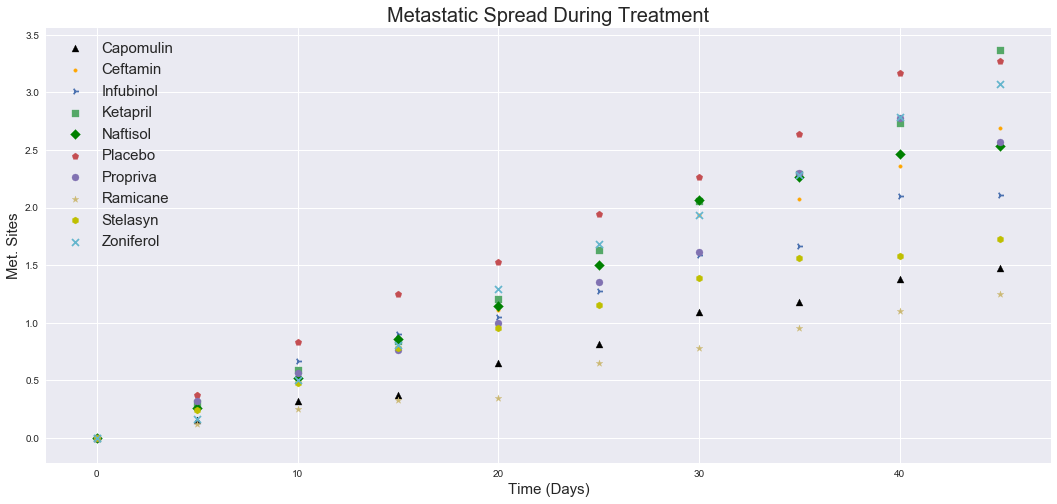

In [11]:
#Plot PT_Metastatic_Response_mean using a scatter plot
plt.figure(figsize=(18,8))

plt.scatter(day,PT_Metastatic_Response_mean.Capomulin,color='black',marker='^');
plt.scatter(day,PT_Metastatic_Response_mean.Ceftamin,color='orange', marker= '.');
plt.scatter(day,PT_Metastatic_Response_mean.Infubinol,marker='4');
plt.scatter(day,PT_Metastatic_Response_mean.Ketapril,marker='s');
plt.scatter(day,PT_Metastatic_Response_mean.Naftisol,color='green',marker='D');
plt.scatter(day,PT_Metastatic_Response_mean.Placebo,marker='p');
plt.scatter(day,PT_Metastatic_Response_mean.Propriva,marker='o');
plt.scatter(day,PT_Metastatic_Response_mean.Ramicane,marker='*');
plt.scatter(day,PT_Metastatic_Response_mean.Stelasyn,color='y',marker='h');
plt.scatter(day,PT_Metastatic_Response_mean.Zoniferol,marker='x');


plt.title('Metastatic Spread During Treatment',fontsize= (20))
plt.xlabel('Time (Days)',fontsize=(15))
plt.ylabel('Met. Sites',fontsize =(15))
plt.legend(loc=2,fontsize=15);

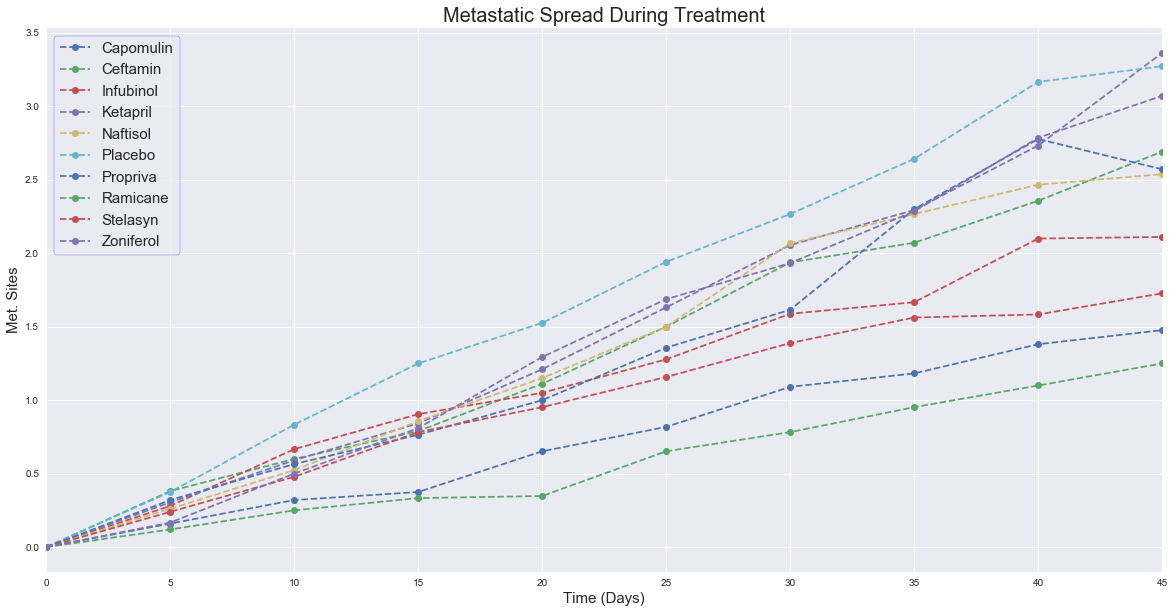

In [12]:
#Plot Metastatic Spread During Treatment using a line plot 

PT_Metastatic_Response_mean.plot(ls='--',figsize=(20,10),marker='o');
plt.title('Metastatic Spread During Treatment',fontsize= (20))
plt.xlabel('Time (Days)',fontsize=(15))
plt.ylabel('Met. Sites',fontsize =(15))
plt.legend(loc=2,fontsize=15,frameon=True,edgecolor='b');


<h3>Survival Rates</h3>

In [13]:
#using groupby to 
df_Survival_Rates = pd.DataFrame(df_treatment.groupby(['Drug','Timepoint'])['Mouse ID'].count())
df_Survival_Rates.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [14]:
PT_Survival_Rates = df_Survival_Rates.pivot_table(values=['Mouse ID'],index=['Timepoint'],columns=['Drug'],aggfunc='mean')
PT_Survival_Rates.columns = PT_Survival_Rates.columns.droplevel()
PT_Survival_Rates.style.highlight_min()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


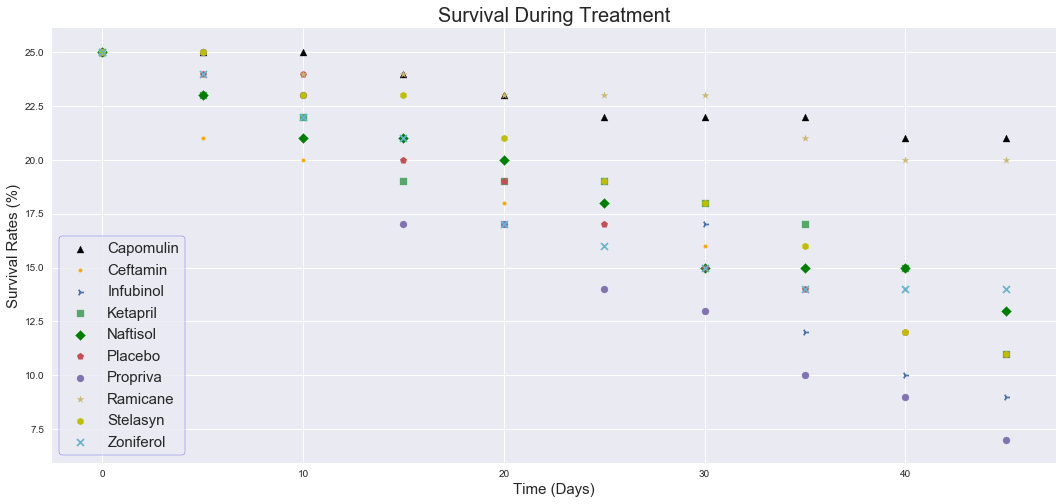

In [15]:
#Plot surivival rates for mice

plt.figure(figsize=(18,8))

plt.scatter(day,PT_Survival_Rates.Capomulin,color='black',marker='^');
plt.scatter(day,PT_Survival_Rates.Ceftamin,color='orange', marker= '.');
plt.scatter(day,PT_Survival_Rates.Infubinol,marker='4');
plt.scatter(day,PT_Survival_Rates.Ketapril,marker='s');
plt.scatter(day,PT_Survival_Rates.Naftisol,color='green',marker='D');
plt.scatter(day,PT_Survival_Rates.Placebo,marker='p');
plt.scatter(day,PT_Survival_Rates.Propriva,marker='o');
plt.scatter(day,PT_Survival_Rates.Ramicane,marker='*');
plt.scatter(day,PT_Survival_Rates.Stelasyn,color='y',marker='h');
plt.scatter(day,PT_Survival_Rates.Zoniferol,marker='x');

plt.legend(fontsize=15,frameon=True,edgecolor='b');
plt.title('Survival During Treatment',fontsize= (20))
plt.xlabel('Time (Days)',fontsize=(15))
plt.ylabel('Survival Rates (%)',fontsize =(15));


<h3><u>Summary Bar Graph</u></h3>

In [16]:
#Calc for the % change for Tumor growth of the past 45 days
s_summary_bar_graph =PT_drug_mean_Tumor_Volume.pct_change().sum()*100

#generate dataframe for s_summary_bar_graph 
df_summary_bar_graph = pd.DataFrame({'%_PCT_over_45_days': s_summary_bar_graph})
df_summary_bar_graph['Tumor_Reduction'] = df_summary_bar_graph['%_PCT_over_45_days'] < 0

#Display Summary Table for Tumor Reduction over the past 45 days
df_summary_bar_graph.style.background_gradient(cmap='autumn')

,%_PCT_over_45_days,Tumor_Reduction
Capomulin,-21.3915,True
Ceftamin,36.1419,False
Infubinol,38.7462,False
Ketapril,46.3081,False
Naftisol,44.1938,False
Placebo,42.3936,False
Propriva,39.5437,False
Ramicane,-24.8656,True
Stelasyn,42.9455,False
Zoniferol,39.068,False


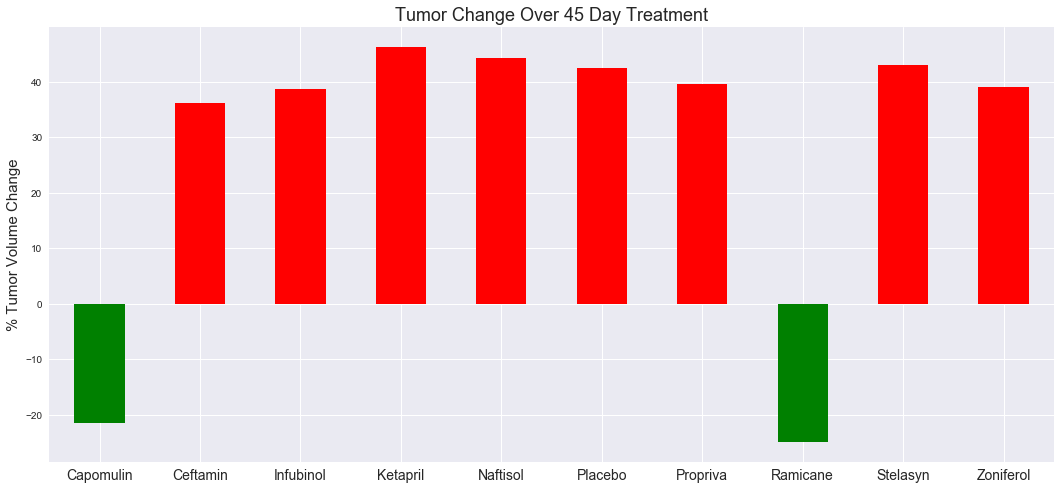

In [37]:
#Plot summary_bar_graph
plt.figure(figsize=(18,8))
df_summary_bar_graph['%_PCT_over_45_days'].plot.bar(color=df_summary_bar_graph.Tumor_Reduction.map({True: 'green', False: 'red'}))
plt.xlabel(' ')
plt.xticks(fontsize=(14),rotation=0)
plt.title('Tumor Change Over 45 Day Treatment',fontsize=(18))
plt.ylabel('% Tumor Volume Change', fontsize=(15));



<h3><u>Conclusion</u></h3>
<p>While performing this analysis on Pymaceuticals Inc datasets. I noticed a few different insights. The insights are below:</p>
<h4><u>Insights</u></h4>
<ul>
<li>In the Tumor Response to Treatment table, the tumor volumes decrease significantly when using Capomulin and Ramicane.</li> 
<p><li>When comparing percent change for tumor size over 45 days for all drugs, Capomulin and Ramicane were the only two drugs which decreased tumors size. </li><br>
<li>When reviewing the Survival Rates table, there was a higher survival rate for mice who had been exposed to Capomulin and Ramicane.</li>
</ul>